# **March Madness**

<img src="https://a.espncdn.com/photo/2025/0316/2025_ncaam_bracket_filled_3x2.jpg" />

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## CBB Data

**Columns**
 - CONF: Conference
 - G: Games played
 - W: Number of wins
 - ADJOE: Adjusted offensive efficiency
 - ADJDE: Adjusted defensive efficiency
 - BARTHAG: Power rating
 - EFG%: Effective field goal percentage
 - EFGD%: Effective field goal percentage allowed
 - TOR: Turnover rate
 - TORD: Forced turnover rate
 - ORB: Offensive rebound rate
 - DRB: Defensive rebound rate
 - FTR: Free throw rate
 - FTRD: Free throw rate allowed
 - 2P_O: Two-point shooting percentage
 - 2P_D: Two-point shooting percentage allowed
 - 3P_O: Three-point shooting percentage
 - 3P_D: Three-point shooting percentage allowed
 - ADJ_T: Adjusted tempo
 - WAB: Wins above bubble
 - Postseason: NCAA tournament finish
 - Seed: Seed in NCAA tournament
 

In [6]:
cbb = pd.read_csv("/Users/jonathan/cmse401/Project/CMSE401-Project/data/cbb.csv")

postseason_mapping = {"Champions": 100,
                     "2ND": 75,
                     "F4": 50,
                     "E8": 35,
                     "S16": 15,
                     "R32": 5,
                     "R64": 0}

cbb['POSTSEASON_INT'] = cbb['POSTSEASON'].map(postseason_mapping)
cbb = cbb.dropna()
cbb

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,REGION,POSTSEASON_INT
0,Kansas,B12,36,28,113.8,92.3,0.9177,52.6,47.0,17.5,...,47.2,34.7,31.0,69.0,10.1,R32,1.0,2023,West,5.0
1,Purdue,B10,35,29,117.9,93.7,0.9333,51.8,47.2,17.2,...,47.2,32.2,31.3,63.9,9.4,R64,1.0,2023,East,0.0
2,Alabama,SEC,37,31,116.1,89.0,0.9548,52.1,41.3,18.7,...,40.8,33.5,28.3,72.6,10.2,S16,1.0,2023,South,15.0
3,Houston,Amer,37,33,117.3,90.3,0.9532,52.3,42.7,15.4,...,43.4,34.0,27.9,63.4,8.0,S16,1.0,2023,Midwest,15.0
4,Gonzaga,WCC,32,28,120.3,89.9,0.9662,58.7,43.1,15.7,...,41.8,37.0,30.5,72.6,6.7,S16,1.0,2022,West,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,Weber St.,BSky,29,17,106.0,106.6,0.4831,54.1,47.8,19.0,...,47.0,39.4,33.7,64.3,-6.9,R64,16.0,2014,West,0.0
3222,Western Kentucky,SB,35,19,100.1,100.4,0.4895,48.6,47.9,22.2,...,47.6,32.7,32.4,66.0,-8.4,R64,16.0,2013,South,0.0
3223,North Carolina A&T,MEAC,36,19,90.6,95.7,0.3459,45.7,45.2,22.7,...,43.4,30.7,32.0,66.9,-11.5,R64,16.0,2013,Midwest,0.0
3224,Southern,SWAC,30,20,95.9,96.7,0.4750,49.1,41.9,16.8,...,40.5,36.7,30.0,65.0,-5.7,R64,16.0,2013,West,0.0


### Relevant Variables

In [7]:
cbb.corr()["POSTSEASON_INT"].sort_values(ascending=False)

POSTSEASON_INT    1.000000e+00
W                 5.022740e-01
WAB               4.509306e-01
ADJOE             4.459384e-01
G                 3.853054e-01
BARTHAG           3.743954e-01
EFG_O             2.052059e-01
2P_O              1.920180e-01
ORB               1.546481e-01
3P_O              1.248625e-01
TORD              3.450582e-02
YEAR             -1.531867e-13
DRB              -1.014374e-02
ADJ_T            -2.363851e-02
FTR              -6.354109e-02
FTRD             -1.305556e-01
3P_D             -1.400574e-01
2P_D             -1.546239e-01
TOR              -1.617970e-01
EFG_D            -1.954761e-01
ADJDE            -3.424668e-01
SEED             -4.511072e-01
Name: POSTSEASON_INT, dtype: float64

### Splitting our Data by Year

In [8]:
regions = ['South', 'Midwest', 'East', 'West']
data_by_year = {}
for year in cbb['YEAR'].unique():
    data_by_year[year] = cbb[cbb['YEAR'] == year]

## Round of 64

In [30]:
def create_R64(data_by_year):
    R64matchups = []
    for year, data in data_by_year.items():
        for region in regions:
            region_df = data[data['REGION'] == region]
            R1region_matchups = []

            for j in range(8):
                team0 = region_df.iloc[j]
                team1 = region_df.iloc[15-j]

                if year != 2025:
                    
                    if (team0["POSTSEASON"] == 'R64'):
                        winner = 1
                    else:
                        winner = 0
                else:
                    
                    winner = -1

                R1region_matchups.append({
                    "Year": int(team0["YEAR"]),
                    "Region": team0["REGION"],
                    "Team #0": team0["TEAM"],
                    "Seed0": int(team0["SEED"]),
                    "ADJOE0": team0["ADJOE"],
                    "ADJDE0": team0["ADJDE"],
                    "Wins0": team0["W"],
                    "Turnover Rate0": team0["TOR"],
                    "Offensive Reb0": team0["ORB"],

                    "Team #1": team1["TEAM"],
                    "Seed1": int(team1["SEED"]),
                    "ADJOE1": team1["ADJOE"],
                    "ADJDE1": team1["ADJDE"],
                    "Wins1": team1["W"],
                    "Turnover Rate1": team1["TOR"],
                    "Offensive Reb1": team1["ORB"],

                    "Winner": winner
                })
            R64matchups.extend(R1region_matchups)
    return pd.DataFrame(R64matchups)

## Round of 32

In [10]:
def create_R32(data_by_year, R64):
    R32matchups = []
    for year, data in data_by_year.items():
        for region in regions:
            region_df = data[data['REGION'] == region]
            df1 = R64[R64["Year"] == year]
            df = df1[df1["Region"] == region]
            R2region_matchups = []

            for j in range(4): 
                winner0 = df.iloc[j][f"Team #{df.iloc[j]['Winner']}"]
                team0 = region_df[region_df["TEAM"] == winner0].iloc[0]

                winner1 = df.iloc[7-j][f"Team #{df.iloc[7-j]['Winner']}"]
                team1 = region_df[region_df["TEAM"] == winner1].iloc[0]

                if (team0["POSTSEASON"] == 'R32'):
                    winner = 1
                else:
                    winner = 0

                R2region_matchups.append({
                    "Year": int(team0["YEAR"]),
                    "Region": team0["REGION"],
                    "Team #0": team0["TEAM"],
                    "Seed0": int(team0["SEED"]),
                    "ADJOE0": team0["ADJOE"],
                    "ADJDE0": team0["ADJDE"],
                    "Wins0": team0["W"],
                    "Turnover Rate0": team0["TOR"],
                    "Offensive Reb0": team0["ORB"],

                    "Team #1": team1["TEAM"],
                    "Seed1": int(team1["SEED"]),
                    "ADJOE1": team1["ADJOE"],
                    "ADJDE1": team1["ADJDE"],
                    "Wins1": team1["W"],
                    "Turnover Rate1": team1["TOR"],
                    "Offensive Reb1": team1["ORB"],

                    "Winner": winner
                })
            R32matchups.extend(R2region_matchups)
    return pd.DataFrame(R32matchups)

## Sweet 16

In [11]:
def create_S16(data_by_year, R32):
    S16matchups = []
    for year, data in data_by_year.items():
        for region in regions:
            region_df = data[data['REGION'] == region]
            df1 = R32[R32["Year"] == year]
            df = df1[df1["Region"] == region]
            S16region_matchups = []

            for j in range(2): 
                winner0 = df.iloc[j][f"Team #{df.iloc[j]['Winner']}"]
                team0 = region_df[region_df["TEAM"] == winner0].iloc[0]

                winner1 = df.iloc[3-j][f"Team #{df.iloc[3-j]['Winner']}"]
                team1 = region_df[region_df["TEAM"] == winner1].iloc[0]

                if (team0["POSTSEASON"] == 'S16'):
                    winner = 1
                else:
                    winner = 0

                S16region_matchups.append({
                    "Year": int(team0["YEAR"]),
                    "Region": team0["REGION"],
                    "Team #0": team0["TEAM"],
                    "Seed0": int(team0["SEED"]),
                    "ADJOE0": team0["ADJOE"],
                    "ADJDE0": team0["ADJDE"],
                    "Wins0": team0["W"],
                    "Turnover Rate0": team0["TOR"],
                    "Offensive Reb0": team0["ORB"],

                    "Team #1": team1["TEAM"],
                    "Seed1": int(team1["SEED"]),
                    "ADJOE1": team1["ADJOE"],
                    "ADJDE1": team1["ADJDE"],
                    "Wins1": team1["W"],
                    "Turnover Rate1": team1["TOR"],
                    "Offensive Reb1": team1["ORB"],

                    "Winner": winner
                })
            S16matchups.extend(S16region_matchups)
    return pd.DataFrame(S16matchups)

## Elite 8

In [12]:
def create_E8(data_by_year, S16):
    E8matchups = []
    for year, data in data_by_year.items():
        for region in regions:
            region_df = data[data['REGION'] == region]
            df1 = S16[S16["Year"] == year]
            df = df1[df1["Region"] == region]
            E8region_matchup = []

            winner0 = df.iloc[0][f"Team #{df.iloc[0]['Winner']}"]
            team0 = region_df[region_df["TEAM"] == winner0].iloc[0]

            winner1 = df.iloc[1][f"Team #{df.iloc[1]['Winner']}"]
            team1 = region_df[region_df["TEAM"] == winner1].iloc[0]

            if (team0["POSTSEASON"] == 'E8'):
                winner = 1
            else:
                winner = 0

            E8region_matchup.append({
                "Year": int(team0["YEAR"]),
                "Region": team0["REGION"],
                "Team #0": team0["TEAM"],
                "Seed0": int(team0["SEED"]),
                "ADJOE0": team0["ADJOE"],
                "ADJDE0": team0["ADJDE"],
                "Wins0": team0["W"],
                "Turnover Rate0": team0["TOR"],
                "Offensive Reb0": team0["ORB"],

                "Team #1": team1["TEAM"],
                "Seed1": int(team1["SEED"]),
                "ADJOE1": team1["ADJOE"],
                "ADJDE1": team1["ADJDE"],
                "Wins1": team1["W"],
                "Turnover Rate1": team1["TOR"],
                "Offensive Reb1": team1["ORB"],

                "Winner": winner
            })
            E8matchups.extend(E8region_matchup)
    return pd.DataFrame(E8matchups)

## Final Four

In [13]:
def create_F4(data_by_year, cbb, E8):
    F4 = []
    for year in cbb['YEAR'].unique():
        df = E8[E8['Year'] == year]
        df1 = data_by_year[year]

        south_rep = df.iloc[0][f"Team #{df.iloc[0]['Winner']}"]
        midwest_rep = df.iloc[1][f"Team #{df.iloc[1]['Winner']}"]
        east_rep = df.iloc[2][f"Team #{df.iloc[2]['Winner']}"]
        west_rep = df.iloc[3][f"Team #{df.iloc[3]['Winner']}"]

        if (year == 2016 or year == 2018):
            team1 = df1[df1["TEAM"] == south_rep].iloc[0]
            team2 = df1[df1["TEAM"] == west_rep].iloc[0]
            team3 = df1[df1["TEAM"] == midwest_rep].iloc[0]
            team4 = df1[df1["TEAM"] == east_rep].iloc[0]

        elif (year == 2013 or year == 2014 or year == 2015 or year == 2023):
            team1 = df1[df1["TEAM"] == midwest_rep].iloc[0]
            team2 = df1[df1["TEAM"] == west_rep].iloc[0]
            team3 = df1[df1["TEAM"] == south_rep].iloc[0]
            team4 = df1[df1["TEAM"] == east_rep].iloc[0]

        else:
            team1 = df1[df1["TEAM"] == south_rep].iloc[0]
            team2 = df1[df1["TEAM"] == midwest_rep].iloc[0]
            team3 = df1[df1["TEAM"] == east_rep].iloc[0]
            team4 = df1[df1["TEAM"] == west_rep].iloc[0]

        if (team1["POSTSEASON"] == 'F4'):
            winner = 1
        else:
            winner = 0

        F4.append({
                "Year": int(team1["YEAR"]),
                "Team #0": team1["TEAM"],
                "Seed0": int(team1["SEED"]),
                "ADJOE0": team1["ADJOE"],
                "ADJDE0": team1["ADJDE"],
                "Wins0": team1["W"],
                "Turnover Rate0": team1["TOR"],
                "Offensive Reb0": team1["ORB"],

                "Team #1": team2["TEAM"],
                "Seed1": int(team2["SEED"]),
                "ADJOE1": team2["ADJOE"],
                "ADJDE1": team2["ADJDE"],
                "Wins1": team2["W"],
                "Turnover Rate1": team2["TOR"],
                "Offensive Reb1": team2["ORB"],

                "Winner": winner
            })

        if (team3["POSTSEASON"] == 'F4'):
            winner = 1
        else:
            winner = 0

        F4.append({
                "Year": int(team3["YEAR"]),
                "Team #0": team3["TEAM"],
                "Seed0": int(team3["SEED"]),
                "ADJOE0": team3["ADJOE"],
                "ADJDE0": team3["ADJDE"],
                "Wins0": team3["W"],
                "Turnover Rate0": team3["TOR"],
                "Offensive Reb0": team3["ORB"],

                "Team #1": team4["TEAM"],
                "Seed1": int(team4["SEED"]),
                "ADJOE1": team4["ADJOE"],
                "ADJDE1": team4["ADJDE"],
                "Wins1": team4["W"],
                "Turnover Rate1": team4["TOR"],
                "Offensive Reb1": team4["ORB"],

                "Winner": winner
            })
    return pd.DataFrame(F4)

## Championship

In [14]:
def create_natty(data_by_year, cbb, F4):
    championship_matchup = []
    for year in cbb['YEAR'].unique():
        df = F4[F4['Year'] == year]
        df1 = data_by_year[year]

        winner0 = df.iloc[0][f"Team #{df.iloc[0]['Winner']}"]
        winner1 = df.iloc[1][f"Team #{df.iloc[1]['Winner']}"]

        team0 = df1[df1["TEAM"] == winner0].iloc[0]
        team1 = df1[df1["TEAM"] == winner1].iloc[0]

        if (team0["POSTSEASON"] == '2ND'):
            winner = 1
        else:
            winner = 0

        championship_matchup.append({
            "Year": int(year),
            "Team #0": team0["TEAM"],
            "Seed0": int(team0["SEED"]),
            "ADJOE0": team0["ADJOE"],
            "ADJDE0": team0["ADJDE"],
            "Wins0": team0["W"],
            "Turnover Rate0": team0["TOR"],
            "Offensive Reb0": team0["ORB"],

            "Team #1": team1["TEAM"],
            "Seed1": int(team1["SEED"]),
            "ADJOE1": team1["ADJOE"],
            "ADJDE1": team1["ADJDE"],
            "Wins1": team1["W"],
            "Turnover Rate1": team1["TOR"],
            "Offensive Reb1": team1["ORB"],

            "Winner": winner
        })
    return pd.DataFrame(championship_matchup)

## Matchup Data Frame

In [15]:
R64 = create_R64(data_by_year)
R32 = create_R32(data_by_year, R64)
S16 = create_S16(data_by_year, R32)
E8 = create_E8(data_by_year, S16)
F4 = create_F4(data_by_year, cbb, E8)
natty = create_natty(data_by_year, cbb, F4)

In [16]:
def create_df(R64, R32, S16, E8, F4, natty):
    R64["Round"] = "R64"
    R32["Round"] = "R32"
    S16["Round"] = "S16"
    E8["Round"] = "E8"
    F4["Round"] = "F4"
    natty["Round"] = "Natty"

    return pd.concat([R64, R32, S16, E8, F4, natty], ignore_index=True)
games = create_df(R64, R32, S16, E8, F4, natty)

## Building our Model

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    # Input Layer (Features of our Teams) --> Hidden Layer (Number of Neurons) --> H2 (n) --> Winner
    def __init__(self, in_features=12, h1=8, h2=8, out_features=2):
        super().__init__() # Instantiates our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [3]:
# Set Seed for Randomization
torch.manual_seed(41)
# Create Instance 
model = Model()

In [17]:
# Splitting Data
features = ["Seed0", "ADJOE0", "ADJDE0", "Wins0", "Turnover Rate0", "Offensive Reb0",
           "Seed1", "ADJOE1", "ADJDE1", "Wins1", "Turnover Rate1", "Offensive Reb1"] # Not Including Round 
X = games[features].values.astype(np.float32)
y = games["Winner"].values

In [18]:
# Convert Data into Tensors
X_train = torch.FloatTensor(X)
y_train = torch.LongTensor(y)

In [19]:
# Account for Overfiiting
weights = torch.tensor([1.0, 425/205], dtype=torch.float32)
# Set Criterion of Model to Measure Error
criterion = nn.CrossEntropyLoss(weight=weights)
# Choose Adam Optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [20]:
# Train our Model
epochs = 100
losses = []
for i in range(epochs):
    # Go Forward and get a Prediction
    y_pred = model.forward(X_train) # Get Predicted Results
    
    # Measure the Error
    loss = criterion(y_pred, y_train)
    
    # Tracking Losses
    losses.append(loss.detach().numpy())
    
    # Print Every 10 Epoch
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
    
    # Propogate
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 4.58022928237915
Epoch: 10 and loss: 0.6792447566986084
Epoch: 20 and loss: 0.6942988634109497
Epoch: 30 and loss: 0.6882632374763489
Epoch: 40 and loss: 0.688644528388977
Epoch: 50 and loss: 0.6874029636383057
Epoch: 60 and loss: 0.6868099570274353
Epoch: 70 and loss: 0.685908317565918
Epoch: 80 and loss: 0.6849786043167114
Epoch: 90 and loss: 0.6838147640228271


Text(0, 0.5, 'Error')

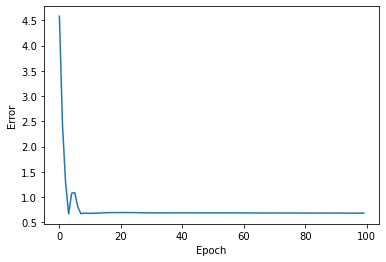

In [21]:
# Graph
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Error")

In [22]:
cbb24 = pd.read_csv("/Users/jonathan/cmse401/Project/CMSE401-Project/data/cbb24.csv")

postseason_mapping = {"Champions": 100,
                     "2ND": 75,
                     "F4": 50,
                     "E8": 35,
                     "S16": 15,
                     "R32": 5,
                     "R64": 0}

cbb24['POSTSEASON_INT'] = cbb24['POSTSEASON'].map(postseason_mapping)
cbb24 = cbb24.dropna()
cbb24_dict = {}
cbb24_dict[2024] = cbb24

In [23]:
R64_2024 = create_R64(cbb24_dict)
R32_2024 = create_R32(cbb24_dict, R64_2024)
S16_2024 = create_S16(cbb24_dict, R32_2024)
E8_2024 = create_E8(cbb24_dict, S16_2024)
F4_2024 = create_F4(cbb24_dict, cbb24, E8_2024)
natty_2024 = create_natty(cbb24_dict, cbb24, F4_2024)

games24 = create_df(R64_2024, R32_2024, S16_2024, E8_2024, F4_2024, natty_2024)

In [24]:
X24 = games24[features].values.astype(np.float32)
X_test = torch.FloatTensor(X24)

y24 = games24["Winner"].values
y_test = torch.LongTensor(y24)

In [25]:
# Evaluate Model on Test Data
with torch.no_grad(): # Turn off Propogation
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test) # Calculating Error
loss

tensor(0.6826)

In [26]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        row = games24.iloc[i]
        matchup = row["Round"]
        team0 = row["Team #0"]
        team1 = row["Team #1"]
        
        # Gives Prediction
        print(f'{matchup} matchup: {team0} vs. {team1}')
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        
        # Correct or Incorrect
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct!')

R64 matchup: Houston vs. Longwood
1.) tensor([-0.4789, -0.6528]) 	 0 	 0
R64 matchup: Marquette vs. Western Kentucky
2.) tensor([-0.3901, -0.5008]) 	 0 	 0
R64 matchup: Kentucky vs. Oakland
3.) tensor([-0.3356, -0.4076]) 	 1 	 0
R64 matchup: Duke vs. Vermont
4.) tensor([-0.3177, -0.3769]) 	 0 	 0
R64 matchup: Wisconsin vs. James Madison
5.) tensor([-0.3301, -0.3981]) 	 1 	 0
R64 matchup: Texas Tech vs. North Carolina St.
6.) tensor([-0.2286, -0.2245]) 	 1 	 1
R64 matchup: Florida vs. Colorado
7.) tensor([-0.2234, -0.2155]) 	 1 	 1
R64 matchup: Nebraska vs. Texas A&M
8.) tensor([-0.2096, -0.1919]) 	 1 	 1
R64 matchup: Purdue vs. Grambling St.
9.) tensor([-0.3799, -0.4834]) 	 0 	 0
R64 matchup: Tennessee vs. Saint Peter's
10.) tensor([-0.3538, -0.4387]) 	 0 	 0
R64 matchup: Creighton vs. Akron
11.) tensor([-0.3469, -0.4269]) 	 0 	 0
R64 matchup: Kansas vs. Samford
12.) tensor([-0.3695, -0.4656]) 	 0 	 0
R64 matchup: Gonzaga vs. McNeese St.
13.) tensor([-0.3411, -0.4170]) 	 0 	 0
R64 matc

## Running our Simulation

In [31]:
cbb25 = pd.read_csv("/Users/jonathan/cmse401/Project/CMSE401-Project/data/cbb25.csv")
cbb25 = cbb25.dropna()
cbb25_dict = {}
cbb25_dict[2025] = cbb25
R64_2025 = create_R64(cbb25_dict)

In [41]:
def simulate_R64(model, df, features, num_simulations):
    results = []
    
    for i, row in df.iterrows():
        team0_wins = 0
        team1_wins = 0
        
        X = row[features].values.astype(np.float32)
        X = torch.FloatTensor(X)
        
        for _ in range(num_simulations):
            with torch.no_grad():
                y_val = model.forward(X)
                noise = torch.normal(mean=0.0, std=0.075, size=y_val.shape)
                y_pred = y_val + noise
                prediction = y_pred.argmax().item()
                
                if prediction == 0:
                    team0_wins += 1
                    
                else:
                    team1_wins += 1
        R64_winner = 0 if team0_wins > team1_wins else 1
        
        results.append({
            "Year": row["Year"],
            "Region": row["Region"],
            "Team #0": row["Team #0"],
            "Team #0 Wins": team0_wins,
            "Team #1 Wins": team1_wins,
            "Team #1": row["Team #1"],
            "Predicted Winner": row[f"Team #{R64_winner}"],
        })
    return pd.DataFrame(results)

In [42]:
simulated_R64 = simulate_R64(model, R64_2025, features, 1000)
simulated_R64

,Year,Region,Team #0,Team #0 Wins,Team #1 Wins,Team #1,Predicted Winner
0,2025,South,Auburn,892,108,Alabama St.,Auburn
1,2025,South,Michigan St.,848,152,Bryant,Michigan St.
2,2025,South,Iowa St.,750,250,Lipscomb,Iowa St.
3,2025,South,Texas A&M,593,407,Yale,Texas A&M
4,2025,South,Michigan,568,432,UC San Diego,Michigan
5,2025,South,Mississippi,670,330,North Carolina,Mississippi
6,2025,South,Marquette,587,413,New Mexico,Marquette
7,2025,South,Louisville,484,516,Creighton,Creighton
8,2025,Midwest,Houston,924,76,SIU Edwardsville,Houston
9,2025,Midwest,Tennessee,853,147,Wofford,Tennessee


In [43]:
for i in range(8):

    total_wins = simulated_R64.iloc[i][3] + simulated_R64.iloc[i+8][3] + simulated_R64.iloc[i+16][3] + simulated_R64.iloc[i+24][3]
    
    winning_percentage = total_wins / 4000
    
    print(f'{i+1} seeds have a {winning_percentage*100}% winning percentage in this simulation')

1 seeds have a 92.15% winning percentage in this simulation
2 seeds have a 86.55000000000001% winning percentage in this simulation
3 seeds have a 81.175% winning percentage in this simulation
4 seeds have a 75.825% winning percentage in this simulation
5 seeds have a 62.475% winning percentage in this simulation
6 seeds have a 58.425000000000004% winning percentage in this simulation
7 seeds have a 52.900000000000006% winning percentage in this simulation
8 seeds have a 40.9% winning percentage in this simulation
